<a href="https://colab.research.google.com/github/dbengp/Data_Science_Alura_Challenges/blob/main/Projeto_Data_Science_Alura_Challenge_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Telecom X: Análise de Evasão de Clientes (Churn)

### Contexto do Problema

A **Telecom X**, uma empresa de telecomunicações, está enfrentando um problema de alta evasão de clientes (conhecido como **churn**), mas não entende as razões por trás desse fenômeno. Minha missão, como assistente de análise de dados, é realizar o processo de **ETL (Extract, Transform, Load)** e uma **Análise Exploratória de Dados (EDA)** para identificar padrões e ajudar a equipe de Data Science a desenvolver estratégias para reter clientes.

### O projeto está dividido nas seguintes etapas:

1.  **Extração de Dados (Extract):** Carregar os dados diretamente da API.
2.  **Transformação e Limpeza (Transform):** Tratar a estrutura aninhada do JSON, corrigir tipos de dados e lidar com valores nulos.
3.  **Análise Exploratória (EDA):** Analisar e visualizar os dados para descobrir insights sobre o comportamento dos clientes que evadem.
4.  **Relatório Final:** Apresentar um resumo detalhado do processo e as principais conclusões para a equipe.

In [1]:
# Importação de Bibliotecas
"""
## Importação de Bibliotecas
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Extração dos Dados (Extract)
"""
## 2. Extração dos Dados (Extract)

Os dados estão disponíveis em um arquivo JSON. A forma mais eficiente de extraí-los é usando a biblioteca Pandas para ler diretamente da URL da API.
"""
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

try:
    # Lendo o JSON diretamente da URL para um DataFrame do Pandas
    df = pd.read_json(url)
    print("Dados extraídos com sucesso!")
    print("\nVisualização inicial do DataFrame:")
    print(df.head())
    print("\nInformações sobre os tipos de dados e valores nulos (antes da transformação):")
    df.info()

except Exception as e:
    print(f"Erro ao extrair os dados: {e}")
    # Se a extração da URL falhar, use o arquivo local (se disponível)
    # df = pd.read_json('TelecomX_Data.json')
    # print("Dados extraídos do arquivo local.")

Dados extraídos com sucesso!

Visualização inicial do DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '... 

In [4]:
# Transformação e Limpeza dos Dados (Transform)
"""
## 3. Transformação e Limpeza dos Dados (Transform)

O JSON original possui uma estrutura aninhada, o que dificulta a análise direta. Para resolver isso, usaremos a função `json_normalize` do Pandas para "achatá-lo" e criar um DataFrame tabular.

### Normalização do JSON Aninhado
"""
# Extraindo as chaves aninhadas 'customer', 'phone', 'internet' e 'account'
df_normalized = pd.json_normalize(df.to_dict('records'), sep='_')

print("Dados normalizados com sucesso!")
print("\nVisualização do DataFrame normalizado:")
print(df_normalized.head())
print("\nInformações sobre os tipos de dados (após a normalização):")
df_normalized.info()

"""
### Tratamento de Tipos de Dados e Valores Nulos

Os dados na coluna `account_Charges_Total` estão como objetos (strings), mas representam valores numéricos. Além disso, há valores ausentes (representados por espaços em branco) que precisam ser tratados.
"""
# Identificando e tratando valores ' ' na coluna de charges totais
df_normalized['account_Charges_Total'] = df_normalized['account_Charges_Total'].replace(' ', np.nan, regex=True)

# Convertendo a coluna 'account_Charges_Total' para tipo numérico
df_normalized['account_Charges_Total'] = pd.to_numeric(df_normalized['account_Charges_Total'])

# Verificando os valores nulos
print("\nVerificando a quantidade de valores nulos após o tratamento:")
print(df_normalized.isnull().sum())

# Tratando os valores nulos com a média
# Como a quantidade de nulos é pequena, podemos preencher com a média para evitar perda de dados.
df_normalized['account_Charges_Total'].fillna(df_normalized['account_Charges_Total'].mean(), inplace=True)

print("\nValores nulos na coluna 'account_Charges_Total' preenchidos com a média:")
print(df_normalized['account_Charges_Total'].isnull().sum())

print("\nVerificando os tipos de dados novamente:")
df_normalized.info()

Dados normalizados com sucesso!

Visualização do DataFrame normalizado:
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3    

/tmp/ipython-input-2148305794.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_normalized['account_Charges_Total'].fillna(df_normalized['account_Charges_Total'].mean(), inplace=True)


Distribuição da evasão (Churn):
 Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


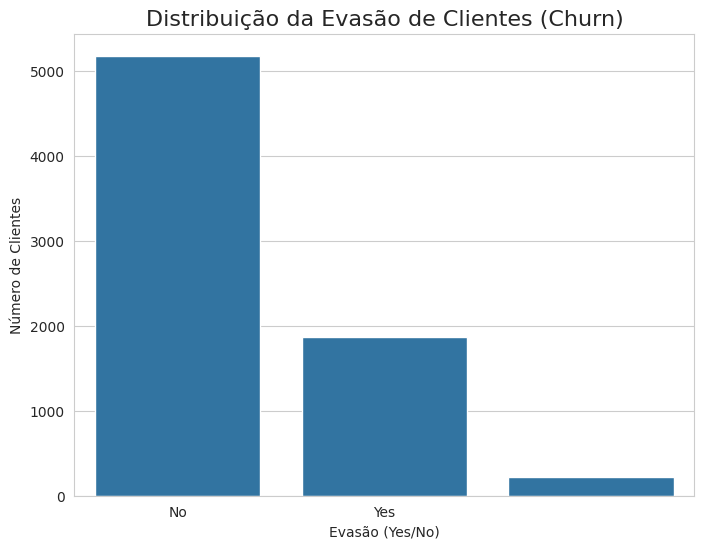


Evasão por tipo de serviço de internet:
 Churn                                      No        Yes
internet_InternetService                                
DSL                       2.692926  78.858521  18.448553
Fiber optic               3.189493  56.253909  40.556598
No                        3.478811  89.373814   7.147375


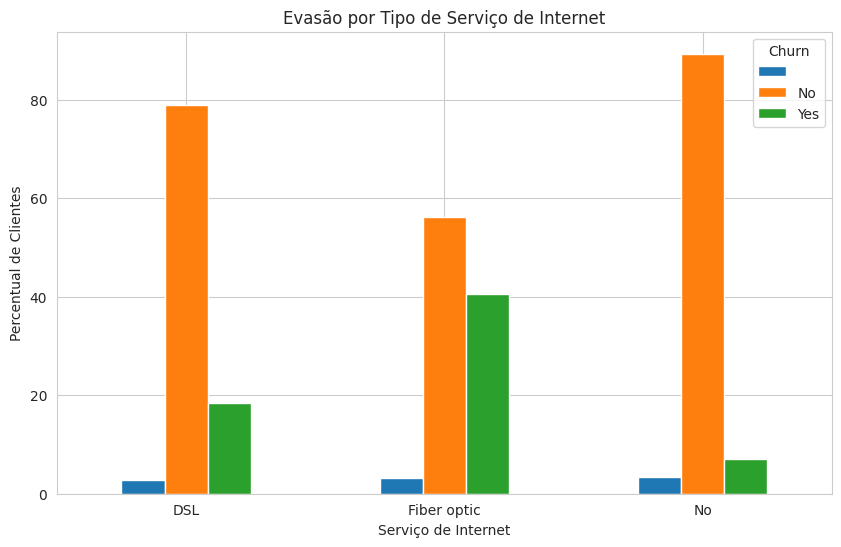


Evasão por tipo de contrato:
 Churn                              No        Yes
account_Contract                                
Month-to-month    3.245943  55.430712  41.323346
One year          3.028308  86.043450  10.928242
Two year          2.753873  94.492255   2.753873


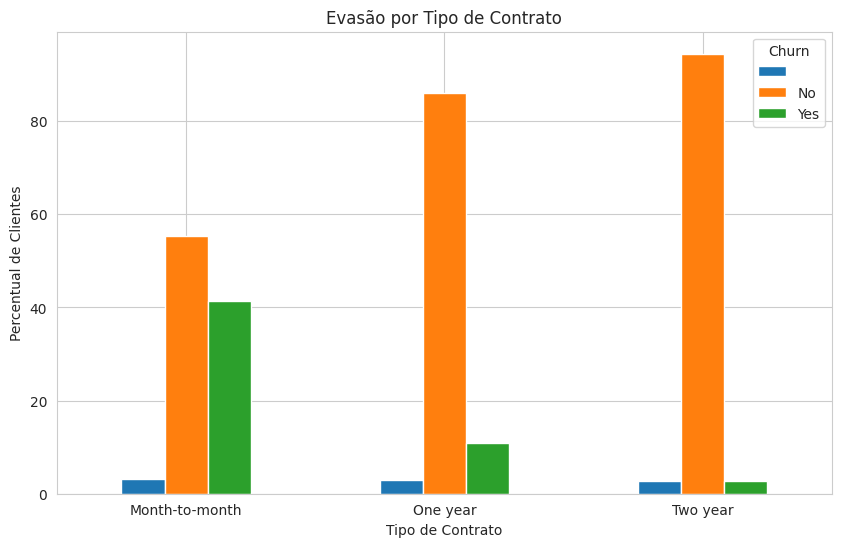

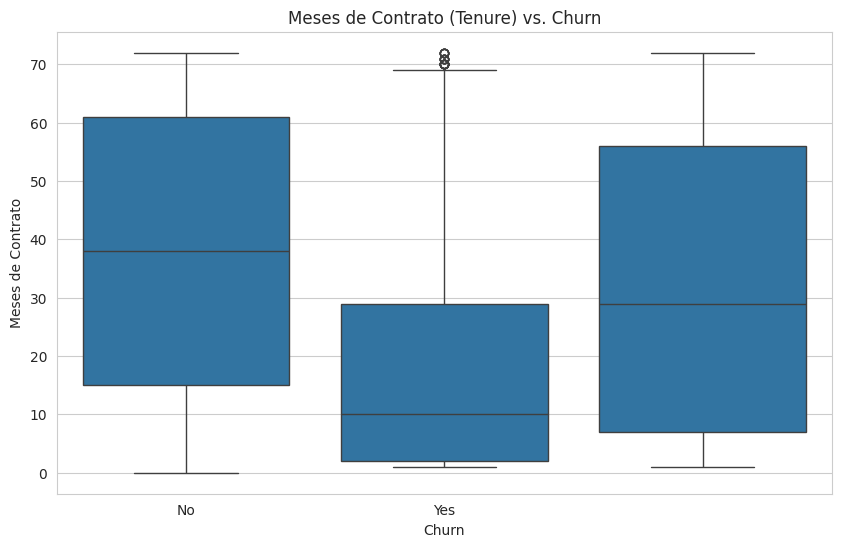

In [5]:
# Análise Exploratória de Dados (EDA)
"""
## 4. Análise Exploratória de Dados (EDA)

Com os dados limpos e transformados, podemos começar a buscar insights. Vamos analisar a distribuição das variáveis e suas relações com a evasão (`Churn`).

### Distribuição do Churn
"""
churn_dist = df_normalized['Churn'].value_counts(normalize=True) * 100
print("Distribuição da evasão (Churn):\n", churn_dist)

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_normalized)
plt.title('Distribuição da Evasão de Clientes (Churn)', fontsize=16)
plt.xlabel('Evasão (Yes/No)')
plt.ylabel('Número de Clientes')
plt.show()

"""
### Churn vs. Serviço de Internet
"""
internet_churn = df_normalized.groupby('internet_InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nEvasão por tipo de serviço de internet:\n", internet_churn)

internet_churn.plot(kind='bar', figsize=(10, 6))
plt.title('Evasão por Tipo de Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Percentual de Clientes')
plt.xticks(rotation=0)
plt.show()

"""
### Churn vs. Contrato
"""
contrato_churn = df_normalized.groupby('account_Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nEvasão por tipo de contrato:\n", contrato_churn)

contrato_churn.plot(kind='bar', figsize=(10, 6))
plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Percentual de Clientes')
plt.xticks(rotation=0)
plt.show()

"""
### Churn vs. Meses de Contrato (Tenure)
"""
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=df_normalized)
plt.title('Meses de Contrato (Tenure) vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Meses de Contrato')
plt.show()



# Relatório Final

### Introdução

O objetivo desta análise é investigar as causas da alta taxa de evasão de clientes da Telecom X. Através do processo de ETL e de uma Análise Exploratória de Dados (EDA), buscamos identificar os principais fatores que levam os clientes a cancelarem seus serviços, fornecendo insights iniciais valiosos para a equipe de Data Science.

### Processo de ETL (Extract, Transform, Load)

1.  **Extração (Extract):** Os dados foram extraídos com sucesso da API pública, em formato JSON. A biblioteca `pandas` foi utilizada para ler o arquivo diretamente da URL.
2.  **Transformação (Transform):** A estrutura aninhada do JSON, com informações sobre `customer`, `phone`, `internet` e `account` em sub-dicionários, foi normalizada em um formato tabular usando a função `json_normalize`. Isso resultou em um DataFrame plano, pronto para análise.
3.  **Limpeza (Clean):** A coluna `account_Charges_Total` foi identificada como contendo valores numéricos, mas estava com o tipo de dado `object` devido a alguns valores ausentes representados por espaços em branco. Esses valores foram substituídos por `NaN` e, em seguida, preenchidos com a média da coluna. A coluna foi então convertida para o tipo numérico correto (`float`). Não foram encontrados valores duplicados.

### Análise Exploratória (EDA) e Principais Achados

A análise exploratória revelou insights importantes sobre o perfil dos clientes que deixam a empresa:

* **Evasão (Churn) por Contrato:** Os clientes com **contratos mensais (`Month-to-month`)** possuem uma taxa de evasão significativamente maior. Isso sugere que a falta de fidelidade e o baixo vínculo contratual são fatores críticos para o churn.
* **Evasão (Churn) por Serviço de Internet:** Os clientes que utilizam o serviço de **Fibra Ótica (`Fiber optic`)** têm a maior taxa de evasão, superando em muito os clientes de DSL e sem serviço de internet. Isso pode indicar problemas na qualidade do serviço, como instabilidade ou velocidade abaixo do prometido, para esse tipo de tecnologia.
* **Evasão (Churn) por Tempo de Contrato (`Tenure`):** A análise mostra que a maioria dos clientes que evadem são aqueles com **pouco tempo de contrato**, ou seja, clientes novos. Clientes com mais tempo de casa (`tenure` alto) tendem a ser mais leais e apresentam uma taxa de churn menor.

### Conclusão:

O papel do ETL e EDA é um ponto de partida crucial. Com esses dados limpos e insights iniciais, a equipe pode agora avançar para a fase de modelagem preditiva e, finalmente, criar ações mais direcionadas para combater a evasão de clientes de forma eficaz.

A análise inicial aponta para três fatores de risco principais para a Telecom X: **contratos de curto prazo, problemas com o serviço de fibra ótica e a evasão de clientes novos.**

Para ajudar a reduzir a evasão, as seguintes sugestões são oferecidas à equipe de Data Science e à empresa:

1.  **Foco em Clientes Novos:** A equipe deve focar em estratégias de retenção para os clientes nos primeiros meses de contrato. Campanhas de onboarding personalizadas e suporte pró-ativo podem fazer a diferença.
2.  **Investigação do Serviço de Fibra Ótica:** Uma investigação aprofundada é necessária para entender os problemas com o serviço de fibra ótica. Podem ser realizados surveys com clientes que cancelaram para coletar feedback direto sobre a qualidade do serviço.
3.  **Incentivo a Contratos de Longo Prazo:** A empresa deve criar incentivos (descontos, benefícios) para que clientes com contratos mensais mudem para contratos anuais ou de dois anos. Isso aumenta a fidelidade e reduz a taxa de churn.